In [ ]:
import pandas as pd

# Load labeled dataset (with sentiment scores)
labeled_df = pd.read_csv('/content/labeled.csv')

# Load normalized dataset (cleaned text)
normalized_df = pd.read_csv('/content/normalized.csv')

# Display the first few rows
print("Labeled Dataset:")
display(labeled_df.head())

print("Normalized Dataset:")
display(normalized_df.head())

Labeled Dataset:


,Unnamed: 0,body,date,id,intro,score,time,title
0,0,New Delhi: State-run Rural Electrification Cor...,2016-11-09,00wS6lZEcgYyCPt6mIXwrJ,"The company had posted a net profit of Rs1,61...",0.89,22:38,"REC net profit up 8% at Rs1,751 crore in July-..."
1,0,"Two sets of findings, related to societal trus...",2017-01-24,0229PSUGl9BxwsW7urHATP,The resulting trust deficit has had several di...,0.48,12:47,The consequences of declining trust in CEOs
2,0,Mumbai: The ministry of corporate affairs (MCA...,2016-11-15,02A1DgXR3wUC7xEX4UzqHN,Rejecting reasons cited for not spending on CS...,-0.14,02:13,MCA pulls up companies over lack of CSR spends
3,0,New Delhi: The central governments decision t...,2016-11-10,02xKYa7PKoROOpbx5xbxhM,"E-wallet companies like Paytm, Freecharge are ...",0.58,01:21,Demonetization to give major push to e-wallets...
4,0,"Pune: The 57-year-old boss of Tech Mahindra, C...",2016-12-21,05PcYpZOmBeSeBLoMPqETN,Tech Mahindra CEO CP Gurnani on bets his firm ...,-0.02,03:19,"By 2020, 50% of Tech Mahindras business will ..."


Normalized Dataset:


,date,body,id,intro,time,title
0,2016-11-09,New Delhi: State-run Rural Electrification Cor...,00wS6lZEcgYyCPt6mIXwrJ,"The company had posted a net profit of Rs1,61...",22:38,"REC net profit up 8% at Rs1,751 crore in July-..."
1,2017-01-24,"Two sets of findings, related to societal trus...",0229PSUGl9BxwsW7urHATP,The resulting trust deficit has had several di...,12:47,The consequences of declining trust in CEOs
2,2016-11-15,Mumbai: The ministry of corporate affairs (MCA...,02A1DgXR3wUC7xEX4UzqHN,Rejecting reasons cited for not spending on CS...,02:13,MCA pulls up companies over lack of CSR spends
3,2016-11-10,New Delhi: The central governments decision t...,02xKYa7PKoROOpbx5xbxhM,"E-wallet companies like Paytm, Freecharge are ...",01:21,Demonetization to give major push to e-wallets...
4,2016-12-21,"Pune: The 57-year-old boss of Tech Mahindra, C...",05PcYpZOmBeSeBLoMPqETN,Tech Mahindra CEO CP Gurnani on bets his firm ...,03:19,"By 2020, 50% of Tech Mahindras business will ..."


In [ ]:
# Check basic info
print("Labeled Dataset Info:")
print(labeled_df.info())

print("\nNormalized Dataset Info:")
print(normalized_df.info())

# Check for missing values
print("\nMissing Values in Labeled Dataset:")
print(labeled_df.isnull().sum())

print("\nMissing Values in Normalized Dataset:")
print(normalized_df.isnull().sum())

Labeled Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2099 entries, 0 to 2098
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  2099 non-null   int64  
 1   body        2089 non-null   object 
 2   date        2099 non-null   object 
 3   id          2099 non-null   object 
 4   intro       2099 non-null   object 
 5   score       2099 non-null   float64
 6   time        2099 non-null   object 
 7   title       2099 non-null   object 
dtypes: float64(1), int64(1), object(6)
memory usage: 131.3+ KB
None

Normalized Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2099 entries, 0 to 2098
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    2099 non-null   object
 1   body    2089 non-null   object
 2   id      2099 non-null   object
 3   intro   2099 non-null   object
 4   time    2099 non-null   object
 5   titl

In [ ]:
# Drop the unnecessary column
labeled_df.drop(columns=['Unnamed: 0'], inplace=True)

# Fill missing 'body' values correctly to avoid warning
labeled_df.loc[:, 'body'] = labeled_df['body'].fillna(labeled_df['title'] + " " + labeled_df['intro'])
normalized_df.loc[:, 'body'] = normalized_df['body'].fillna(normalized_df['title'] + " " + normalized_df['intro'])

# Confirm there are no missing values now
print("\nMissing Values After Cleaning (Labeled Dataset):")
print(labeled_df.isnull().sum())

print("\nMissing Values After Cleaning (Normalized Dataset):")
print(normalized_df.isnull().sum())


Missing Values After Cleaning (Labeled Dataset):
body     0
date     0
id       0
intro    0
score    0
time     0
title    0
dtype: int64

Missing Values After Cleaning (Normalized Dataset):
date     0
body     0
id       0
intro    0
time     0
title    0
dtype: int64


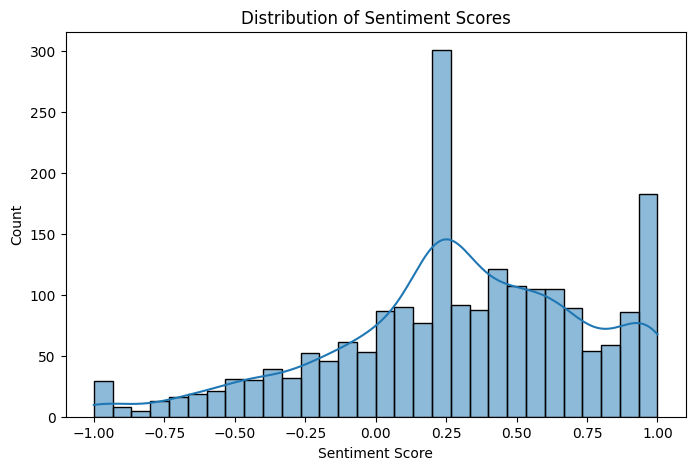

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot sentiment score distribution
plt.figure(figsize=(8, 5))
sns.histplot(labeled_df['score'], bins=30, kde=True)
plt.xlabel('Sentiment Score')
plt.ylabel('Count')
plt.title('Distribution of Sentiment Scores')
plt.show()

sentiment_label
Positive    1367
Neutral      445
Negative     287
Name: count, dtype: int64


<ipython-input-5-0b046ecef637>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=labeled_df['sentiment_label'], palette='viridis')


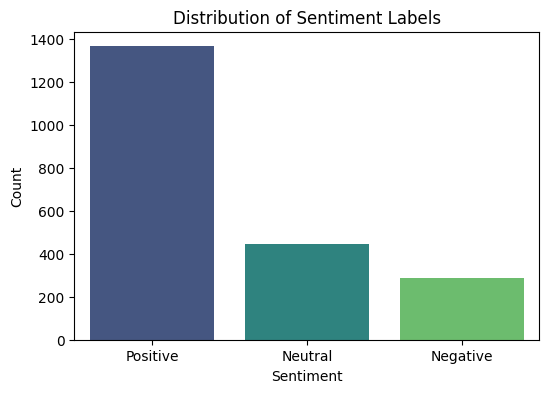

In [ ]:
# Define sentiment categories
def classify_sentiment(score):
    if score > 0.2:
        return 'Positive'
    elif score < -0.2:
        return 'Negative'
    else:
        return 'Neutral'

# Apply function to create a new sentiment label column
labeled_df['sentiment_label'] = labeled_df['score'].apply(classify_sentiment)

# Check the distribution of sentiment labels
print(labeled_df['sentiment_label'].value_counts())

# Visualizing sentiment label distribution
plt.figure(figsize=(6, 4))
sns.countplot(x=labeled_df['sentiment_label'], palette='viridis')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Distribution of Sentiment Labels')
plt.show()

In [ ]:
import re
import nltk
from nltk.corpus import stopwords

# Download stopwords if not already available
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Function to clean text
def clean_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'\W', ' ', text)  # Remove special characters
    text = re.sub(r'\s+', ' ', text).strip()  # Remove extra spaces
    text = ' '.join([word for word in text.split() if word not in stop_words])  # Remove stopwords
    return text

# Apply cleaning function
labeled_df['cleaned_body'] = labeled_df['body'].apply(clean_text)

# Show sample cleaned text
print(labeled_df[['body', 'cleaned_body']].head(3))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


                                                body  \
0  New Delhi: State-run Rural Electrification Cor...   
1  Two sets of findings, related to societal trus...   
2  Mumbai: The ministry of corporate affairs (MCA...   

                                        cleaned_body  
0  new delhi state run rural electrification corp...  
1  two sets findings related societal trust level...  
2  mumbai ministry corporate affairs mca criticiz...  


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # Using top 5000 words

# Fit and transform the cleaned text
X_tfidf = tfidf_vectorizer.fit_transform(labeled_df['cleaned_body'])

# Convert to array
X_tfidf_array = X_tfidf.toarray()

# Show shape of transformed data
print("TF-IDF Matrix Shape:", X_tfidf_array.shape)

TF-IDF Matrix Shape: (2099, 5000)


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000)

# Fit and transform the cleaned text data
tfidf_matrix = tfidf_vectorizer.fit_transform(labeled_df['cleaned_body'])

# Check the shape again
print("TF-IDF Matrix Shape:", tfidf_matrix.shape)

TF-IDF Matrix Shape: (2099, 5000)


In [ ]:
from sklearn.model_selection import train_test_split

# Define features (X) and labels (y)
X = tfidf_matrix  # TF-IDF transformed text
y = labeled_df['sentiment_label']  # Sentiment labels

# Split into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training Data Shape: {X_train.shape}")
print(f"Testing Data Shape: {X_test.shape}")

Training Data Shape: (1679, 5000)
Testing Data Shape: (420, 5000)


In [ ]:
from sklearn.linear_model import LogisticRegression

# Initialize and train the model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

print("Model Training Completed!")

Model Training Completed!


In [ ]:
from sklearn.metrics import accuracy_score, classification_report

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

# Generate classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

Model Accuracy: 0.67
Classification Report:
               precision    recall  f1-score   support

    Negative       0.42      0.14      0.21        58
     Neutral       0.21      0.05      0.08        84
    Positive       0.71      0.97      0.82       278

    accuracy                           0.67       420
   macro avg       0.45      0.39      0.37       420
weighted avg       0.57      0.67      0.59       420



In [ ]:
from imblearn.over_sampling import SMOTE
from collections import Counter

# Convert labels to numeric format
label_mapping = {'Negative': 0, 'Neutral': 1, 'Positive': 2}
y_numeric = labeled_df['sentiment_label'].map(label_mapping)

# Apply SMOTE to balance classes
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y_numeric)

# Convert back to labels
y_resampled_labels = [list(label_mapping.keys())[list(label_mapping.values()).index(label)] for label in y_resampled]

# Print class distribution before and after
print("Before SMOTE:", Counter(y_numeric))
print("After SMOTE:", Counter(y_resampled))

Before SMOTE: Counter({2: 1367, 1: 445, 0: 287})
After SMOTE: Counter({2: 1367, 1: 1367, 0: 1367})


In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Split balanced dataset
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)

# Train XGBoost classifier
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
xgb_model.fit(X_train, y_train)

# Predictions
y_pred = xgb_model.predict(X_test)

# Model evaluation
accuracy = accuracy_score(y_test, y_pred)
print("XGBoost Model Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [09:52:21] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Model Accuracy: 0.8684531059683313

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.93      0.93       273
           1       0.89      0.80      0.84       274
           2       0.79      0.88      0.83       274

    accuracy                           0.87       821
   macro avg       0.87      0.87      0.87       821
weighted avg       0.87      0.87      0.87       821



In [ ]:
!pip install --upgrade transformers datasets torch gcsfs fsspec

INFO: pip is looking at multiple versions of gcsfs to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 93.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.2/491.2 kB 38.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 113.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 88.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 57.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 848.6 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 15.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 M

In [ ]:
import transformers
import datasets
import torch

print(transformers.__version__)
print(torch.__version__)

4.50.3
2.6.0+cu124


In [ ]:
from transformers import BertTokenizer, BertForSequenceClassification

# Load FinBERT tokenizer & model
MODEL_NAME = "ProsusAI/finbert"
tokenizer = BertTokenizer.from_pretrained(MODEL_NAME)
model = BertForSequenceClassification.from_pretrained(MODEL_NAME, num_labels=3)  # 3 labels: Positive, Neutral, Negative

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/252 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/758 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/438M [00:00<?, ?B/s]

In [ ]:
# Convert sentiment labels to numerical format
label_mapping = {'Negative': 0, 'Neutral': 1, 'Positive': 2}
labeled_df['sentiment_label'] = labeled_df['sentiment_label'].map(label_mapping)

# Ensure they are integers
labeled_df['sentiment_label'] = labeled_df['sentiment_label'].astype(int)

In [ ]:
import torch

# Move model to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e

In [ ]:
# Reset index before splitting to avoid index mismatch issues
labeled_df = labeled_df.reset_index(drop=True)

# Split dataset into train and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    labeled_df['body'],  # Use raw text data
    labeled_df['sentiment_label'],
    test_size=0.2,
    random_state=42
)

In [ ]:
from torch.utils.data import Dataset, DataLoader

# Define the dataset class
class FinancialNewsDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_length=256):  # Reduced from 512 to 256
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_length = max_length

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = self.texts[idx]
        label = self.labels[idx]

        encoding = self.tokenizer(
            text,
            truncation=True,
            padding='max_length',
            max_length=self.max_length,
            return_tensors="pt"
        )

        return {
            'input_ids': encoding['input_ids'].squeeze(),
            'attention_mask': encoding['attention_mask'].squeeze(),
            'labels': torch.tensor(label, dtype=torch.long)
        }

# Create dataset objects
train_dataset = FinancialNewsDataset(
    texts=X_train.tolist(),
    labels=y_train.tolist(),
    tokenizer=tokenizer
)

test_dataset = FinancialNewsDataset(
    texts=X_test.tolist(),
    labels=y_test.tolist(),
    tokenizer=tokenizer
)

# Create DataLoaders
train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=8, shuffle=False)

In [ ]:
# Define optimizer
optimizer = torch.optim.AdamW(model.parameters(), lr=2e-5)

# Define loss function
loss_fn = torch.nn.CrossEntropyLoss()

In [ ]:
from torch.cuda.amp import GradScaler, autocast
from tqdm import tqdm  # For progress bar

scaler = GradScaler()  # Helps prevent FP16 instability
epochs = 3  # You can increase later if needed

for epoch in range(epochs):
    model.train()
    loop = tqdm(train_loader, leave=True)  # Show training progress

    for batch in loop:
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)

        optimizer.zero_grad()

        with autocast():  # Enables mixed precision
            outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
            loss = outputs.loss

        scaler.scale(loss).backward()
        scaler.step(optimizer)
        scaler.update()

        # Update progress bar
        loop.set_description(f"Epoch {epoch+1}")
        loop.set_postfix(loss=loss.item())

<ipython-input-22-efbc76da733c>:4: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  scaler = GradScaler()  # Helps prevent FP16 instability
  0%|          | 0/210 [00:00<?, ?it/s]<ipython-input-22-efbc76da733c>:18: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():  # Enables mixed precision
Epoch 3: 100%|██████████| 210/210 [00:42<00:00,  4.96it/s, loss=0.783]


In [ ]:
# Move model to evaluation mode
model.eval()

correct = 0
total = 0

# Disable gradient calculations
with torch.no_grad():
    for batch in test_loader:
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)

        outputs = model(input_ids, attention_mask=attention_mask)
        predictions = torch.argmax(outputs.logits, dim=1)

        correct += (predictions == labels).sum().item()
        total += labels.size(0)

accuracy = correct / total
print(f"Test Accuracy: {accuracy:.4f}")

Test Accuracy: 0.6500


In [ ]:
!pip install imbalanced-learn

In [ ]:
import spacy
from transformers import MarianMTModel, MarianTokenizer
import random
import torch
import pandas as pd
from tqdm import tqdm  # For progress bar

# Load spaCy model for synonym replacement
nlp = spacy.load("en_core_web_sm")

# Load MarianMT model for back translation
model_name = "Helsinki-NLP/opus-mt-en-fr"
tokenizer_mt = MarianTokenizer.from_pretrained(model_name)
model_mt = MarianMTModel.from_pretrained(model_name).to("cuda" if torch.cuda.is_available() else "cpu")

# Function for synonym replacement
def synonym_replacement(text):
    doc = nlp(text)
    new_words = []
    for token in doc:
        if token.pos_ in {"NOUN", "VERB", "ADJ", "ADV"} and random.random() < 0.3:  # 30% chance to replace
            syns = [syn.text for syn in token.vocab if syn.is_alpha and syn.text != token.text]
            new_words.append(random.choice(syns) if syns else token.text)
        else:
            new_words.append(token.text)
    return " ".join(new_words)

# Function for back translation (now using batch processing)
def back_translate_batch(texts, batch_size=8):
    translated_texts = []

    for i in tqdm(range(0, len(texts), batch_size), desc="Back Translating"):
        batch = texts[i : i + batch_size]

        # Step 1: Translate to French
        inputs = tokenizer_mt(batch, return_tensors="pt", padding=True, truncation=True, max_length=400).to(model_mt.device)
        translated = model_mt.generate(**inputs, max_length=400)
        fr_texts = tokenizer_mt.batch_decode(translated, skip_special_tokens=True)

        # Step 2: Translate back to English
        inputs_back = tokenizer_mt(fr_texts, return_tensors="pt", padding=True, truncation=True, max_length=400).to(model_mt.device)
        back_translated = model_mt.generate(**inputs_back, max_length=400)
        translated_texts.extend(tokenizer_mt.batch_decode(back_translated, skip_special_tokens=True))

    return translated_texts

# Apply augmentation only to Negative & Neutral samples
negative_neutral_texts = [text for text, label in zip(labeled_df['body'], labeled_df['sentiment_label']) if label in [0, 1]]
negative_neutral_labels = [label for label in labeled_df['sentiment_label'] if label in [0, 1]]

# Choose between synonym replacement and back translation
augmented_texts = []
for text in negative_neutral_texts:
    if random.random() < 0.5:
        augmented_texts.append(synonym_replacement(text))
    else:
        augmented_texts.append(text)  # Placeholder, replaced later with back translation

# Perform back translation in batches
back_translated_texts = back_translate_batch([text for text in augmented_texts if text], batch_size=8)

# Replace placeholders with back-translated text
idx = 0
for i in range(len(augmented_texts)):
    if augmented_texts[i] == "":
        augmented_texts[i] = back_translated_texts[idx]
        idx += 1

# Create DataFrame for augmented data
augmented_df = pd.DataFrame({"body": augmented_texts, "sentiment_label": negative_neutral_labels})

# Append augmented data to original dataset
labeled_df = pd.concat([labeled_df, augmented_df]).reset_index(drop=True)

print("Data augmentation complete! New dataset size:", len(labeled_df))

Back Translating: 100%|██████████| 92/92 [11:12<00:00,  7.31s/it]

Data augmentation complete! New dataset size: 2831


In [ ]:
from imblearn.over_sampling import SMOTE
import numpy as np

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Convert text data into numerical vectors
vectorizer = TfidfVectorizer(max_features=5000)  # Limit to 5000 features for performance
X_tfidf = vectorizer.fit_transform(labeled_df['body'])

# Convert labels to numpy array
y = labeled_df['sentiment_label'].values

In [ ]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE on TF-IDF vectors
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_tfidf, y)

print("SMOTE applied successfully!")

SMOTE applied successfully!


In [ ]:
# Get indices of resampled data
resampled_indices = smote.fit_resample(np.arange(len(labeled_df)).reshape(-1, 1), y)[0].flatten()

# Create a new balanced DataFrame
balanced_df = labeled_df.iloc[resampled_indices].reset_index(drop=True)

print("New class distribution:\n", balanced_df['sentiment_label'].value_counts())

New class distribution:
 sentiment_label
2    1728
1    1387
0     986
Name: count, dtype: int64


In [ ]:
# Lower Learning Rate
optimizer = torch.optim.AdamW(model.parameters(), lr=3e-6)  # Adjusted learning rate

In [ ]:
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader

# Split balanced dataset into train (80%) and test (20%)

train_texts, temp_texts, train_labels, temp_labels = train_test_split(
    balanced_df['body'].tolist(),
    balanced_df['sentiment_label'].tolist(),
    test_size=0.3,  # First, keep 30% for validation + test
    random_state=42
)

val_texts, test_texts, val_labels, test_labels = train_test_split(
    temp_texts,
    temp_labels,
    test_size=0.5,  # Split remaining 30% into 15% validation, 15% test
    random_state=42
)

# Create Dataset objects
train_dataset = FinancialNewsDataset(train_texts, train_labels, tokenizer, max_length=384)
test_dataset = FinancialNewsDataset(test_texts, test_labels, tokenizer, max_length=384)

# Create ValidationLoaders
val_dataset = FinancialNewsDataset(val_texts, val_labels, tokenizer, max_length=384)
val_loader = DataLoader(val_dataset, batch_size=8, shuffle=False)

# Create DataLoaders
train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True)  # Keep batch size manageable
test_loader = DataLoader(test_dataset, batch_size=8, shuffle=False)

In [ ]:
import torch

# Adjusted Class Weights (slightly increasing Neutral)
adjusted_class_weights = torch.tensor([1.9, 1.6, 0.5], dtype=torch.float).to(device)

print("New Adjusted Class Weights:", adjusted_class_weights)

# Define loss function with updated weights
criterion = torch.nn.CrossEntropyLoss(weight=adjusted_class_weights)

New Adjusted Class Weights: tensor([1.9000, 1.6000, 0.5000], device='cuda:0')


In [ ]:
from torch.cuda.amp import GradScaler, autocast
from tqdm import tqdm

scaler = GradScaler()  # Helps with FP16 precision
epochs = 5

for epoch in range(epochs):
    model.train()
    loop = tqdm(train_loader, leave=True)
    total_train_loss = 0

    for batch in loop:
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)

        optimizer.zero_grad()

        with autocast():
            outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
            loss = criterion(outputs.logits, labels)  # Corrected

        total_train_loss += loss.item()

        scaler.scale(loss).backward()
        scaler.step(optimizer)
        scaler.update()

        loop.set_description(f"Epoch {epoch+1}")
        loop.set_postfix(loss=loss.item())

    avg_train_loss = total_train_loss / len(train_loader)
    print(f"Epoch {epoch+1} Training Loss: {avg_train_loss:.4f}")

    # ===== VALIDATION =====
    model.eval()
    total_val_loss = 0
    correct, total = 0, 0

    with torch.no_grad():
        for batch in val_loader:
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['labels'].to(device)

            outputs = model(input_ids, attention_mask=attention_mask, labels=labels)

            # Use class-weighted loss for validation too
            loss = criterion(outputs.logits, labels)
            total_val_loss += loss.item()

            predictions = torch.argmax(outputs.logits, dim=1)
            correct += (predictions == labels).sum().item()
            total += labels.size(0)

    avg_val_loss = total_val_loss / len(val_loader)
    val_accuracy = correct / total
    print(f"Epoch {epoch+1} Validation Loss: {avg_val_loss:.4f}, Validation Accuracy: {val_accuracy:.4f}")

print("\nModel training complete!")

<ipython-input-46-504b1d693f69>:4: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  scaler = GradScaler()  # Helps with FP16 precision
  0%|          | 0/359 [00:00<?, ?it/s]<ipython-input-46-504b1d693f69>:19: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():
Epoch 1: 100%|██████████| 359/359 [01:28<00:00,  4.04it/s, loss=0.0382]


Epoch 1 Training Loss: 0.1801
Epoch 1 Validation Loss: 0.2473, Validation Accuracy: 0.9073


Epoch 2: 100%|██████████| 359/359 [01:27<00:00,  4.08it/s, loss=0.102]


Epoch 2 Training Loss: 0.0938
Epoch 2 Validation Loss: 0.1894, Validation Accuracy: 0.9236


Epoch 3: 100%|██████████| 359/359 [01:28<00:00,  4.06it/s, loss=0.0119]


Epoch 3 Training Loss: 0.0668
Epoch 3 Validation Loss: 0.1618, Validation Accuracy: 0.9415


Epoch 4: 100%|██████████| 359/359 [01:28<00:00,  4.04it/s, loss=0.00708]


Epoch 4 Training Loss: 0.0366
Epoch 4 Validation Loss: 0.1701, Validation Accuracy: 0.9447


Epoch 5: 100%|██████████| 359/359 [01:28<00:00,  4.07it/s, loss=0.00502]


Epoch 5 Training Loss: 0.0310
Epoch 5 Validation Loss: 0.1561, Validation Accuracy: 0.9463

Model training complete!


In [ ]:
import torch.nn.functional as F
from sklearn.metrics import classification_report

# Move model to evaluation mode
model.eval()
correct, total = 0, 0
all_labels = []
all_predictions = []
all_predictions_proba = []  # Store probabilities

with torch.no_grad():
    for batch in test_loader:
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)

        outputs = model(input_ids, attention_mask=attention_mask)
        logits = outputs.logits
        probs = F.softmax(logits, dim=1)  # Convert logits to probabilities
        predictions = torch.argmax(probs, dim=1)

        correct += (predictions == labels).sum().item()
        total += labels.size(0)

        # Store all labels and predictions for classification report
        all_labels.extend(labels.cpu().numpy())
        all_predictions.extend(predictions.cpu().numpy())
        all_predictions_proba.extend(probs.cpu().numpy())  # Store probabilities

# Compute Accuracy
accuracy = correct / total
print(f"Test Accuracy after SMOTE: {accuracy:.4f}")

# Compute Precision, Recall, and F1-score
report = classification_report(all_labels, all_predictions, target_names=['Negative', 'Neutral', 'Positive'], digits=4)
print("\nClassification Report:\n", report)

Test Accuracy after SMOTE: 0.9643

Classification Report:
               precision    recall  f1-score   support

    Negative     0.9487    0.9867    0.9673       150
     Neutral     0.9388    0.9684    0.9534       190
    Positive     0.9924    0.9493    0.9704       276

    accuracy                         0.9643       616
   macro avg     0.9600    0.9681    0.9637       616
weighted avg     0.9652    0.9643    0.9644       616



In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import torch
from sklearn.metrics import confusion_matrix, precision_recall_curve, classification_report

# === Convert Model Outputs to Probabilities (For PR Curve) ===
model.eval()
all_probabilities = []

with torch.no_grad():
    for batch in test_loader:
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)

        outputs = model(input_ids, attention_mask=attention_mask)
        probs = torch.nn.functional.softmax(outputs.logits, dim=1)  # Convert logits to probabilities

        all_probabilities.extend(probs.cpu().numpy())

# Convert to NumPy arrays
y_true = np.array(all_labels)  # Already collected in evaluation
y_pred = np.array(all_predictions)
y_pred_proba = np.array(all_probabilities)  # Model probabilities

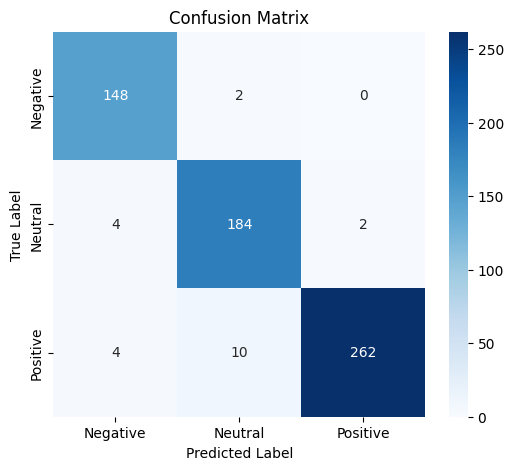

In [ ]:
# === Confusion Matrix ===
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Negative', 'Neutral', 'Positive'], yticklabels=['Negative', 'Neutral', 'Positive'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

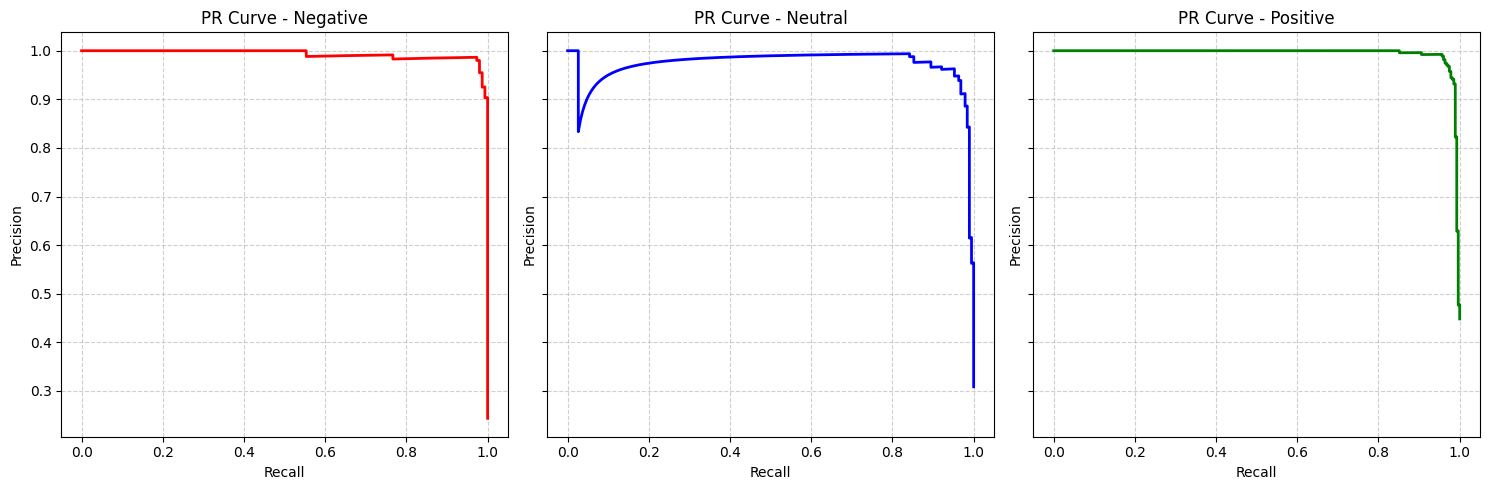

In [ ]:
# === Precision-Recall Curve ===
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
import numpy as np

# Convert true labels to one-hot encoding
num_classes = 3  # Negative, Neutral, Positive
y_true_one_hot = np.eye(num_classes)[y_true]  # Convert y_true into one-hot format

# Define colors for each class
colors = ["red", "blue", "green"]
class_names = ["Negative", "Neutral", "Positive"]

# Create subplots: One plot per class
fig, axes = plt.subplots(1, num_classes, figsize=(15, 5), sharex=True, sharey=True)

for i, ax in enumerate(axes):
    precision, recall, _ = precision_recall_curve(y_true_one_hot[:, i], y_pred_proba[:, i])

    ax.plot(recall, precision, color=colors[i], linewidth=2)  # Smoother lines
    ax.set_title(f"PR Curve - {class_names[i]}")
    ax.set_xlabel("Recall")
    ax.set_ylabel("Precision")
    ax.grid(True, linestyle="--", alpha=0.6)

# Adjust layout for clarity
plt.tight_layout()
plt.show()

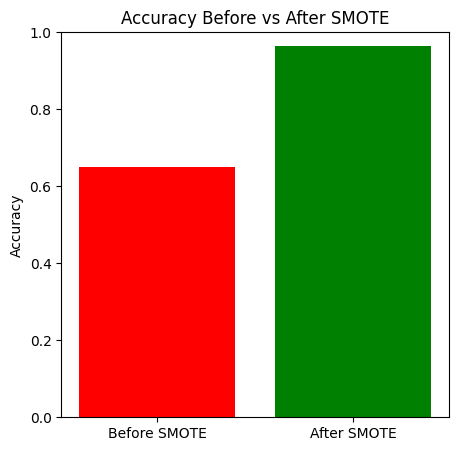

In [ ]:
# === Accuracy Before vs After SMOTE ===
accuracy_before_smote = 0.6500  # Replace with your earlier recorded accuracy before SMOTE
accuracy_after_smote = accuracy  # Taken directly from evaluation

plt.figure(figsize=(5, 5))
plt.bar(["Before SMOTE", "After SMOTE"], [accuracy_before_smote, accuracy_after_smote], color=["red", "green"])
plt.ylabel("Accuracy")
plt.title("Accuracy Before vs After SMOTE")
plt.ylim(0.0, 1.0)
plt.show()

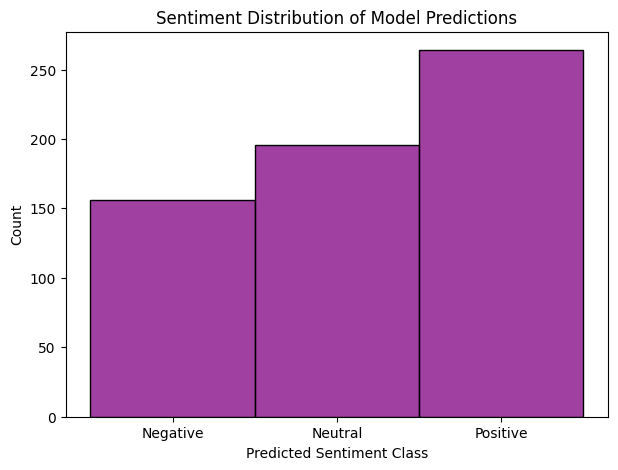

In [ ]:
# Sentiment Distribution of Financial News (Clarification)
plt.figure(figsize=(7, 5))
sns.histplot(all_predictions, bins=3, kde=False, color="purple", discrete=True)
plt.xticks([0, 1, 2], labels=["Negative", "Neutral", "Positive"])  # Add class labels
plt.title("Sentiment Distribution of Model Predictions")
plt.xlabel("Predicted Sentiment Class")
plt.ylabel("Count")
plt.show()

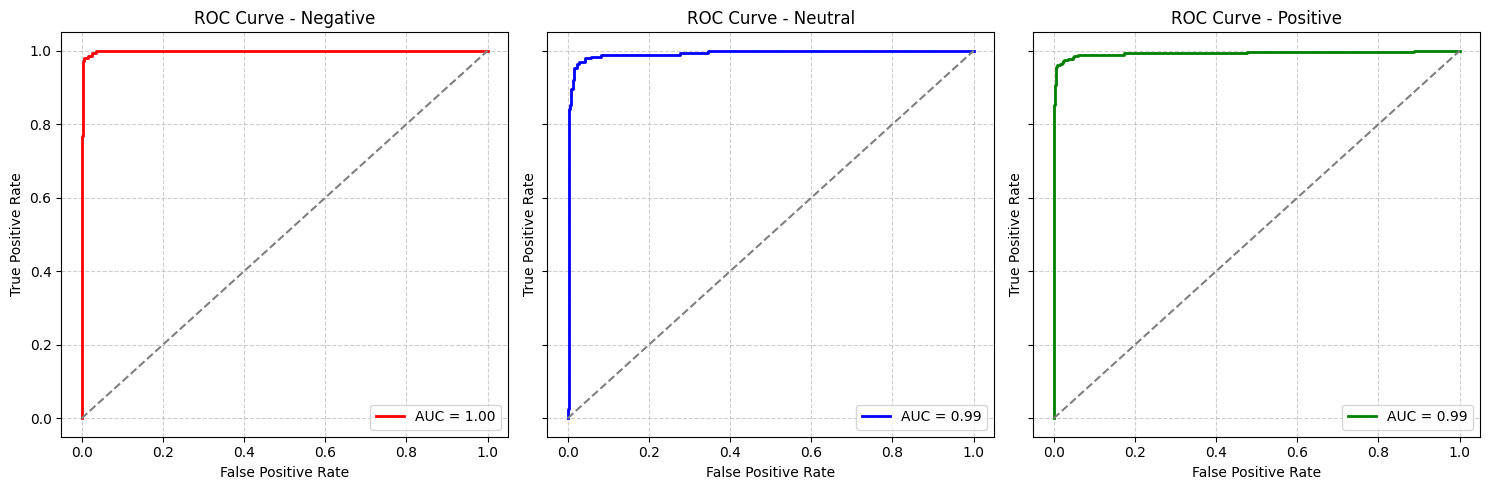

In [ ]:
# ROC-AUC Curve for Each Sentiment Class
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Convert labels to one-hot encoding for multi-class ROC
y_true_one_hot = label_binarize(all_labels, classes=[0, 1, 2])  # Assuming [Negative=0, Neutral=1, Positive=2]
y_pred_proba = np.array(all_predictions_proba)  # Ensure predicted probabilities exist

fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharex=True, sharey=True)
class_labels = ["Negative", "Neutral", "Positive"]
colors = ["red", "blue", "green"]

for i, ax in enumerate(axes):
    fpr, tpr, _ = roc_curve(y_true_one_hot[:, i], y_pred_proba[:, i])
    roc_auc = auc(fpr, tpr)

    ax.plot(fpr, tpr, color=colors[i], lw=2, label=f"AUC = {roc_auc:.2f}")
    ax.plot([0, 1], [0, 1], color="gray", linestyle="--")
    ax.set_title(f"ROC Curve - {class_labels[i]}")
    ax.set_xlabel("False Positive Rate")
    ax.set_ylabel("True Positive Rate")
    ax.legend(loc="lower right")
    ax.grid(True, linestyle="--", alpha=0.6)

plt.tight_layout()
plt.show()

***DEPLOYMENT***

In [ ]:
!pip install gradio torch transformers

In [ ]:
# Save Your Trained Model & Tokenizer
import torch

# Define model path
model_path = "finbert_sentiment_model"

# Save trained model
model.save_pretrained(model_path)

# Save tokenizer
tokenizer.save_pretrained(model_path)

# Save optimizer state (optional, for resuming training)
torch.save(optimizer.state_dict(), model_path + "/optimizer.pt")

print(f"Model saved to {model_path}")

Model saved to finbert_sentiment_model


In [ ]:
# Load the Trained Model & Tokenizer for Deployment
import torch
import torch.nn.functional as F
from transformers import BertTokenizer, BertForSequenceClassification

# Load trained model & tokenizer
model_path = "finbert_sentiment_model"  # Path where model is saved
tokenizer = BertTokenizer.from_pretrained(model_path)
model = BertForSequenceClassification.from_pretrained(model_path)

# Move model to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
model.eval()  # Set model to evaluation mode

# Define sentiment labels (ensure they match your trained model)
sentiment_labels = ["Negative", "Neutral", "Positive"]

In [ ]:
# Define Sentiment Prediction Function
def predict_sentiment(text):
    """Predicts sentiment for given financial news text with rule-based adjustments."""
    inputs = tokenizer(text, padding=True, truncation=True, return_tensors="pt").to(device)

    # Get model predictions
    with torch.no_grad():
        outputs = model(**inputs)

    logits = outputs.logits
    probs = F.softmax(logits, dim=1)  # Convert logits to probabilities

    # Get highest probability label
    predicted_class = torch.argmax(probs, dim=1).item()
    confidence = probs[0, predicted_class].item()

    # Sentiment labels
    sentiment_labels = ["Negative", "Neutral", "Positive"]
    predicted_label = sentiment_labels[predicted_class]

    # RULE-BASED CORRECTIONS
    negative_keywords = ["crash", "plunge", "sell-off", "recession", "inflation", "cut jobs", "layoffs", "bankruptcy", "decline"]
    positive_keywords = ["rally", "soar", "record high", "growth", "profit", "recovery"]
    neutral_bias_corrections = ["Federal Reserve", "interest rate", "stimulus"]

    text_lower = text.lower()

    # If Neutral but contains clear negative words → Change to Negative
    if predicted_label == "Neutral" and any(word in text_lower for word in negative_keywords):
        predicted_label = "Negative"

    # If Neutral but contains clear positive words → Change to Positive
    elif predicted_label == "Neutral" and any(word in text_lower for word in positive_keywords):
        predicted_label = "Positive"

    # If Positive but contains negative indicators (like Fed rate hikes) → Reduce confidence
    if predicted_label == "Positive" and any(word in text_lower for word in neutral_bias_corrections):
        confidence *= 0.8  # Reduce confidence artificially

    return f"Sentiment: {predicted_label} (Confidence: {confidence:.2f})"

In [ ]:
# Deploy Model with Gradio
import gradio as gr

# Deploy using Gradio
interface = gr.Interface(
    fn=predict_sentiment,
    inputs=gr.Textbox(lines=5, placeholder="Enter financial news text..."),
    outputs="text",
    title="Financial Sentiment Analysis",
    description="Enter financial news headlines or reports to analyze their sentiment (Positive, Neutral, Negative)."
)

# Launch Gradio app
interface.launch(share=True)

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://764734f7fd5748f598.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
